In [36]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import os

from sklearn.model_selection import train_test_split

In [37]:
# change setting to show all columns
pd.set_option('display.max_columns', None)

In [38]:
# Use function to connect to Codeup database 

def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''
    This function takes in user credentials from an env.py file and a database name and creates a connection to the Codeup database through a connection string 
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [39]:
# Use function to conduct and read in SQL query

zillow_sql_query =  '''
                    select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, 
                    taxvaluedollarcnt, yearbuilt, taxamount, fips
                    from properties_2017
                    join propertylandusetype using(propertylandusetypeid)
                    where propertylandusedesc = 'Single Family Residential';
                    '''

def query_zillow_data():
    '''
    This function uses the get_connection function to connect to the zillow database and returns the zillow_sql_query read into a pandas dataframe
    '''
    return pd.read_sql(zillow_sql_query,get_connection('zillow'))

In [40]:
def get_zillow_data():
    '''
    This function checks for a local zillow.csv file and reads it into a pandas dataframe, if it exists. If not, it uses the get_connection & query_zillow_data functions to query the data and write it locally to a csv file
    '''
    # If csv file exists locally, read in data from csv file.
    if os.path.isfile('zillow.csv'):
        df = pd.read_csv('zillow.csv', index_col=0)
        
    else:
        
        # Query and read data from zillow_churn database
        df = query_zillow_data()
        
        # Cache data
        df.to_csv('zillow.csv')
        
    return df

In [59]:
# Assign dataframe to a variable
df = get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [42]:
# Check dataframe shape
df.shape

(2152863, 7)

In [43]:
# Check columns, data types
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


In [9]:
# Check statistical information for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [10]:
# Check on the properties with no bathrooms
df[df.bathroomcnt == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,13027.0,0.219160,8.721996e-01,0.00,0.00,0.00,0.000,18.00
bathroomcnt,13027.0,0.000000,0.000000e+00,0.00,0.00,0.00,0.000,0.00
calculatedfinishedsquarefeet,4767.0,1499.777848,8.009850e+03,1.00,360.00,757.00,1614.500,531118.00
taxvaluedollarcnt,12642.0,628227.591758,2.387811e+06,1.00,25860.00,117279.00,436037.250,98428909.00
yearbuilt,4960.0,1957.728226,2.576746e+01,1887.00,1940.00,1956.00,1980.000,2016.00
taxamount,11112.0,8542.263659,3.507197e+04,1.85,572.29,1977.73,6122.365,1337755.86
fips,13027.0,6059.356490,3.004623e+01,6037.00,6037.00,6037.00,6059.000,6111.00


In [11]:
# Check bedroomcnt values for the properties with no bathrooms
df[df.bathroomcnt == 0].bedroomcnt.value_counts()

0.0     12088
3.0       307
4.0       246
1.0       148
2.0       145
5.0        74
6.0        14
18.0        1
11.0        1
8.0         1
7.0         1
14.0        1
Name: bedroomcnt, dtype: int64

In [12]:
# check column values
col_list = df[['bedroomcnt', 'bathroomcnt']]
for col in col_list:
    print(df[col].value_counts(dropna=False))

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
NaN         11
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64
2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
NaN          11
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
14.50         1
32.00         1
19.50         1
19.00         1
Name: bathroomcnt, dtype: int64


In [13]:
# check for nulls
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [14]:
# check if 11 null bedroomcnt & bathroomcnt values are for the same observations
df[df.bedroomcnt.isnull()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0
1141339,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0
1324608,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0
1442975,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0
1647346,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0
1701026,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0
1722707,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0
1776422,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0


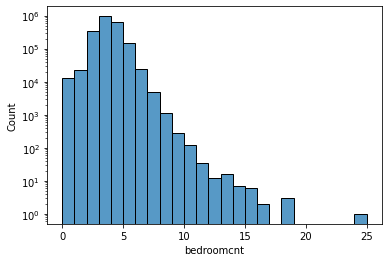

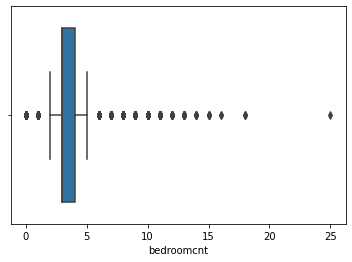

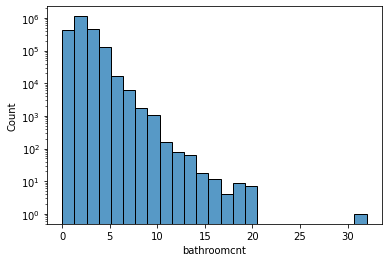

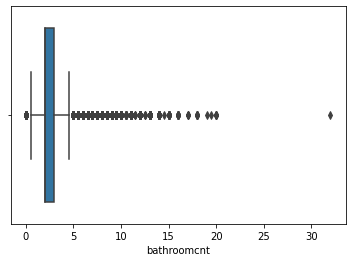

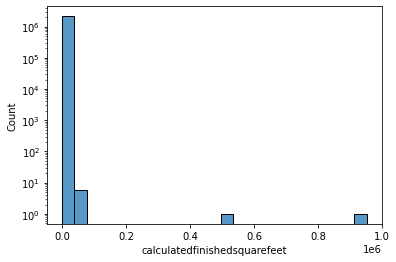

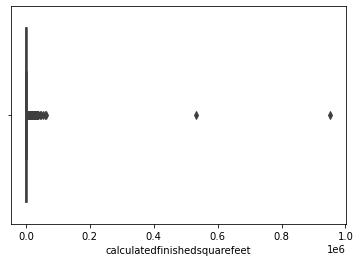

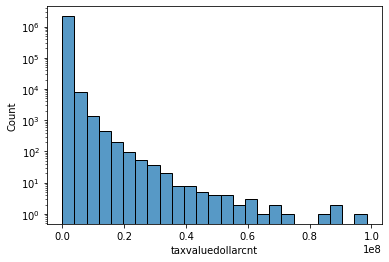

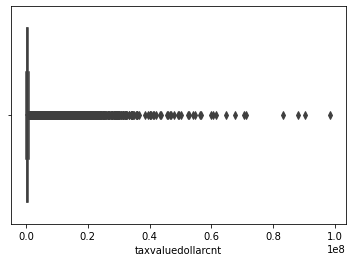

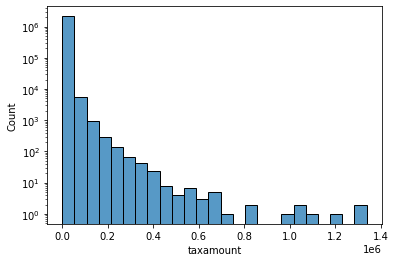

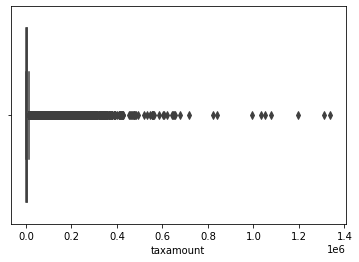

In [15]:
num_cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
            'taxvaluedollarcnt', 'taxamount' ]
for col in num_cols: 
    sns.histplot(df[col], log_scale=[False,True], bins=25)
    plt.show()
    sns.boxplot(df[col])
    plt.show()

## Acquire and Summarize Takeaways

- There are some pretty extreme outliers in the data that should be removed as they are not representative of the average home for which we are trying to predict price
- Several of the columns should be converted to a different datatype (bedroomcnt,  calculatedfinishedsquarefeet, & taxvaluedollarcnt, to int; yearbuilt & fips to object).
- 11 observations have NaNs for both bedroomcnt & bathroomcnt and can be dropped.
- Drop rows that have 0 bathrooms and 0 bedrooms
- Age would be a good feature that can be calculated from yearbuilt and used for modeling

In [16]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [60]:
# Rename some columns for simplicity
df = df.rename(columns={'bedroomcnt':'bedrooms', 'bathroomcnt':'bathrooms', 'calculatedfinishedsquarefeet':'area', 'taxvaluedollarcnt':'taxvalue'})
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [61]:
# Remove outliers
def remove_outliers(df, k, col_list):
    ''' 
    This function remove outliers from a list of columns in a dataframe 
    and returns that dataframe
    '''
    
    # loop through each column
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [62]:
# Apply the function to bedroom and bathroom columns and check that changes were made
df = remove_outliers(df, 1.5, ['bedrooms','bathrooms','area','taxvalue','taxamount'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1855285.0,3.214593,0.781464,2.00,3.00,3.00,4.00,5.00
bathrooms,1855285.0,2.053629,0.707729,1.00,2.00,2.00,2.50,4.00
area,1855285.0,1653.860449,564.642431,1.00,1231.00,1548.00,1988.00,3410.00
taxvalue,1855285.0,327947.824862,198968.724988,22.00,173806.00,296621.00,452500.00,950940.00
yearbuilt,1854411.0,1959.444875,20.546039,1801.00,1949.00,1957.00,1972.00,2016.00
taxamount,1855285.0,4069.332016,2242.381016,16.48,2366.34,3747.01,5487.57,10377.84
fips,1855285.0,6048.348769,20.548267,6037.00,6037.00,6037.00,6059.00,6111.00


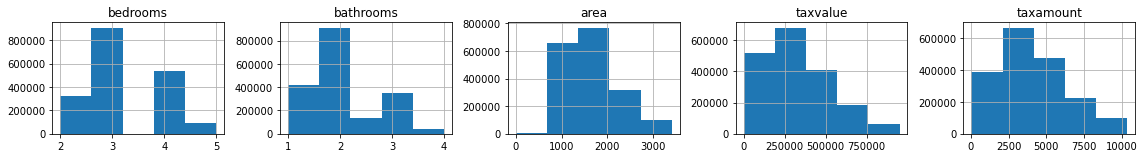

In [63]:
# Check the distribution after applying the function
plt.figure(figsize=(16, 4))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'yearbuilt']]

for i, col in enumerate(cols, start=1):

    # Set plot number for subplot
    plot_number = i 

    # Create subplot.
    plt.subplot(2, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
    # mitigate overlap
    plt.tight_layout()
    
plt.show()

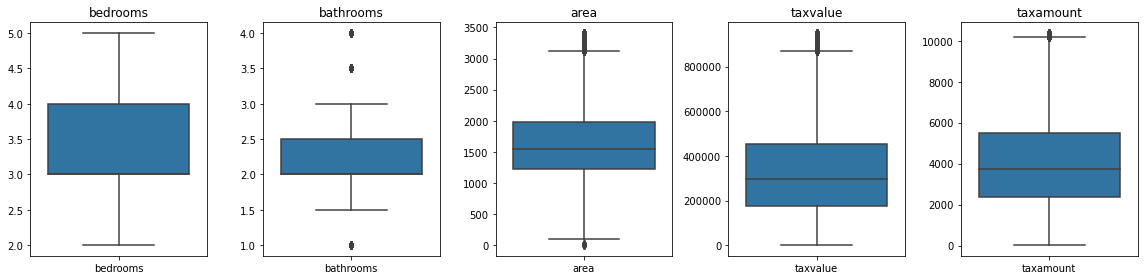

In [21]:
# Check if all outliers were removed
plt.figure(figsize=(16, 4))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'yearbuilt']]

for i, col in enumerate(cols, start=1):

    # Set plot number for subplot
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # sets proper spacing between plots
    plt.tight_layout()

plt.show()

In [64]:
# Remove more of the outliers for area
df = df[(df.area > 500) & (df.area < 2500)]

In [65]:
# Remove more of the outliers for taxvalue
df = df[(df.taxvalue > 500) & (df.taxvalue < 800000)]

In [66]:
# Check remaining observations
df.shape

(1654161, 7)

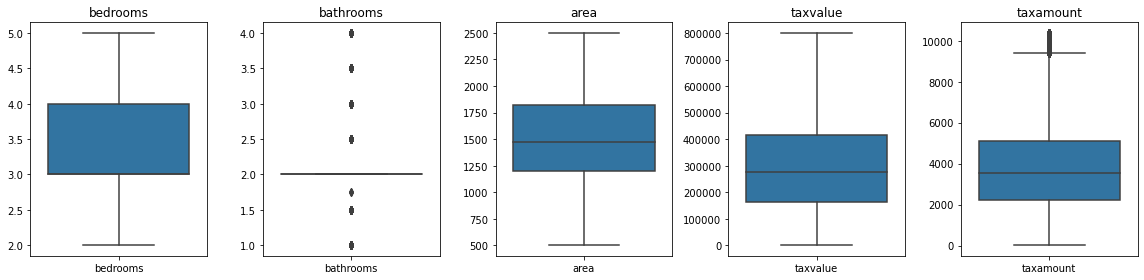

In [67]:
# Check distribution after removing more outliers 
plt.figure(figsize=(16, 4))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'yearbuilt']]

for i, col in enumerate(cols, start=1):

    # Set plot number for subplot
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # sets proper spacing between plots
    plt.tight_layout()

plt.show()

In [58]:
# check if there are still nulls
df.isnull().sum()

bedrooms       0
bathrooms      0
area           0
taxvalue       0
yearbuilt    726
taxamount      0
fips           0
age          726
dtype: int64

In [69]:
# drop rows with null values since it is only a small portion of the dataframe 
df = df.dropna()
df.shape

(1653435, 7)

In [70]:
# check that there are no more nulls
df.isnull().any()

bedrooms     False
bathrooms    False
area         False
taxvalue     False
yearbuilt    False
taxamount    False
fips         False
dtype: bool

In [71]:
# create age column based on yearbuilt
df['age'] = 2021 - df.yearbuilt
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,fips,age
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,95.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0,71.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0,71.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0,70.0
23,3.0,2.5,1821.0,537949.0,2013.0,6173.72,6059.0,8.0


In [72]:
# Change data types where it makes sense
int_col_list = ['bedrooms','area','taxvalue','age']
obj_col_list = ['yearbuilt','fips']

for col in df:
    if col in int_col_list:
        df[col] = df[col].astype(int)
    if col in obj_col_list:
        df[col] = df[col].astype(int).astype(object)
        
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653435 entries, 7 to 2152862
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bedrooms   1653435 non-null  int64  
 1   bathrooms  1653435 non-null  float64
 2   area       1653435 non-null  int64  
 3   taxvalue   1653435 non-null  int64  
 4   yearbuilt  1653435 non-null  object 
 5   taxamount  1653435 non-null  float64
 6   fips       1653435 non-null  object 
 7   age        1653435 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 113.5+ MB


In [73]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,fips,age
7,3,2.0,2077,646760,1926,7924.68,6037,95
18,3,1.0,1244,169471,1950,2532.88,6037,71
19,3,2.0,1300,233266,1950,3110.99,6037,71
20,3,2.0,1222,290492,1951,3870.25,6037,70
23,3,2.5,1821,537949,2013,6173.72,6059,8


In [74]:
# check column values
col_list = df[['bedrooms', 'bathrooms']]
for col in col_list:
    print(df[col].value_counts(dropna=False))

3    857089
4    433375
2    314519
5     48452
Name: bedrooms, dtype: int64
2.00    889057
1.00    382610
3.00    232619
2.50    107089
1.50     30456
4.00      8363
3.50      3238
1.75         3
Name: bathrooms, dtype: int64


In [75]:
# drop taxamount since we will be predicting tax value and tax amount is considered data leakage
df = df.drop(columns='taxamount')
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,fips,age
7,3,2.0,2077,646760,1926,6037,95
18,3,1.0,1244,169471,1950,6037,71
19,3,2.0,1300,233266,1950,6037,71
20,3,2.0,1222,290492,1951,6037,70
23,3,2.5,1821,537949,2013,6059,8


In [76]:
# Check values for FIPS
df.fips.value_counts()

6037    1134174
6059     395391
6111     123870
Name: fips, dtype: int64

In [77]:
# Encode FIPS column and concatenate onto original dataframe
dummy_df = pd.get_dummies(df['fips'], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,fips,age,6059,6111
7,3,2.0,2077,646760,1926,6037,95,0,0
18,3,1.0,1244,169471,1950,6037,71,0,0
19,3,2.0,1300,233266,1950,6037,71,0,0
20,3,2.0,1222,290492,1951,6037,70,0,0
23,3,2.5,1821,537949,2013,6059,8,1,0


In [33]:
# Split the data into train, validate, and test
train_validate, test = train_test_split(df, test_size=.2, random_state=369)
train, validate = train_test_split(train_validate, test_size=.3, random_state=369)

print(train.shape)
print(validate.shape)
print(test.shape)

(925923, 6)
(396825, 6)
(330687, 6)


In [78]:
########## Acquire ##########

def get_zillow_data():
    '''
    This function checks for a local zillow.csv file and reads it into a pandas dataframe, if it exists. If not, it uses the get_connection & query_zillow_data functions to query the data and write it locally to a csv file
    '''
    # If csv file exists locally, read in data from csv file.
    if os.path.isfile('zillow.csv'):
        df = pd.read_csv('zillow.csv', index_col=0)
        
    else:
        
        # Query and read data from zillow_churn database
        df = query_zillow_data()
        
        # Cache data
        df.to_csv('zillow.csv')
        
    return df

########## Clean & Split ##########


# Remove outliers
def remove_outliers(df, k, col_list):
    ''' 
    This function remove outliers from a list of columns in a dataframe 
    and returns that dataframe
    '''
    
    # loop through each column
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df


def clean_zillow_data(df):
    '''
    This function takes in the zillow data, cleans it, and returns a dataframe
    '''
    
    # Rename some columns for simplicity
    df = df.rename(columns={'bedroomcnt':'bedrooms', 'bathroomcnt':'bathrooms', 
                            'calculatedfinishedsquarefeet':'area',
                            'taxvaluedollarcnt':'taxvalue'})
    # Apply a function to remove outliers
    df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms','area','taxvalue','taxamount'])
    
    # Remove more of the outliers for area
    df = df[(df.area > 500) & (df.area < 2500)]
    # Remove more of the outliers for taxvalue
    df = df[(df.taxvalue > 500) & (df.taxvalue < 800000)]
    
    # Drop rows with null values since it is only a small portion of the dataframe 
    df = df.dropna()
    
    # create age column based on yearbuilt
    df['age'] = 2021 - df.yearbuilt
    
    # Create list of datatypes I want to change
    int_col_list = ['bedrooms','area','taxvalue','age']
    obj_col_list = ['yearbuilt','fips']
    
    # Change data types where it makes sense
    for col in df:
        if col in int_col_list:
            df[col] = df[col].astype(int)
        if col in obj_col_list:
            df[col] = df[col].astype(int).astype(object)
    
    # drop taxamount since we will be predicting tax value and tax amount is considered data leakage
    df = df.drop(columns='taxamount')
    
    # Encode FIPS column and concatenate onto original dataframe
    dummy_df = pd.get_dummies(df['fips'], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    
    return df


# Split the data into train, validate, and test
def split_data(df, random_state=369, stratify=None):
    '''
    This function takes in a dataframe and splits the data into train, validate and test samples. 
    Test, validate, and train are 20%, 24%, & 56% of the original dataset, respectively. 
    The function returns train, validate and test dataframes.
    '''
   
    if stratify == None:
        # split dataframe 80/20
        train_validate, test = train_test_split(df, test_size=.2, random_state=random_state)

        # split larger dataframe from previous split 70/30
        train, validate = train_test_split(train_validate, test_size=.3, random_state=random_state)
    else:

        # split dataframe 80/20
        train_validate, test = train_test_split(df, test_size=.2, random_state=random_state, stratify=df[stratify])

        # split larger dataframe from previous split 70/30
        train, validate = train_test_split(train_validate, test_size=.3, 
                            random_state=random_state,stratify=train_validate[stratify])

    # results in 3 dataframes
    return train, validate, test


########## Wrangle ##########

def wrangle_zillow():
    '''This function acquires, cleans, and splits data from the zillow database for exploration'''
    train, validate, test = split_data(clean_zillow_data(get_zillow_data()))
    
    return train, validate, test


In [79]:
train, validate, test = wrangle_zillow()
train.shape, validate.shape, test.shape

((925923, 9), (396825, 9), (330687, 9))